In [5]:
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

In [9]:
# importando os dados com Pandas
dados = "https://www.edsonmelo.com.br/dados_csv/ocorrencias_cenipa.csv"
df = pd.read_csv(dados, sep=';', encoding='latin-1')

In [10]:
df.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,aeronaves_envolvidas,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,12/01/2010,2010,14:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,08/04/2010,2010,14:20:00,SIM,FINALIZADA,1,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,19/03/2010,2010,19:30:00,SIM,FINALIZADA,1,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,21/03/2010,2010,20:45:00,SIM,FINALIZADA,1,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,10/03/2010,2010,17:20:00,SIM,FINALIZADA,1,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


In [11]:
# qual é o tamanho da nossa amostra?
df.shape

(5242, 21)

In [12]:
# quais são os tipos dos dados?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [13]:
# quais tipos (categorias) estão disponíveis na coluna "tipo"?
df['tipo'].unique() # unique() retorna valores numéricos únicos

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

In [15]:
# qual a quantidade de ocorrências por categoria?
# outra opção: df['tipo'][df['tipo'] == 'INCIDENTE'].count()
df['tipo'].value_counts()

INCIDENTE          2887
ACIDENTE           1694
INCIDENTE GRAVE     661
Name: tipo, dtype: int64

In [20]:
# visualizando graficamente resultados das categorias
df_categorias = df['tipo'].value_counts()
df_categorias

# vamos salvar esse resultado em um arquivo
df_categorias.to_csv('df_categorias.csv')

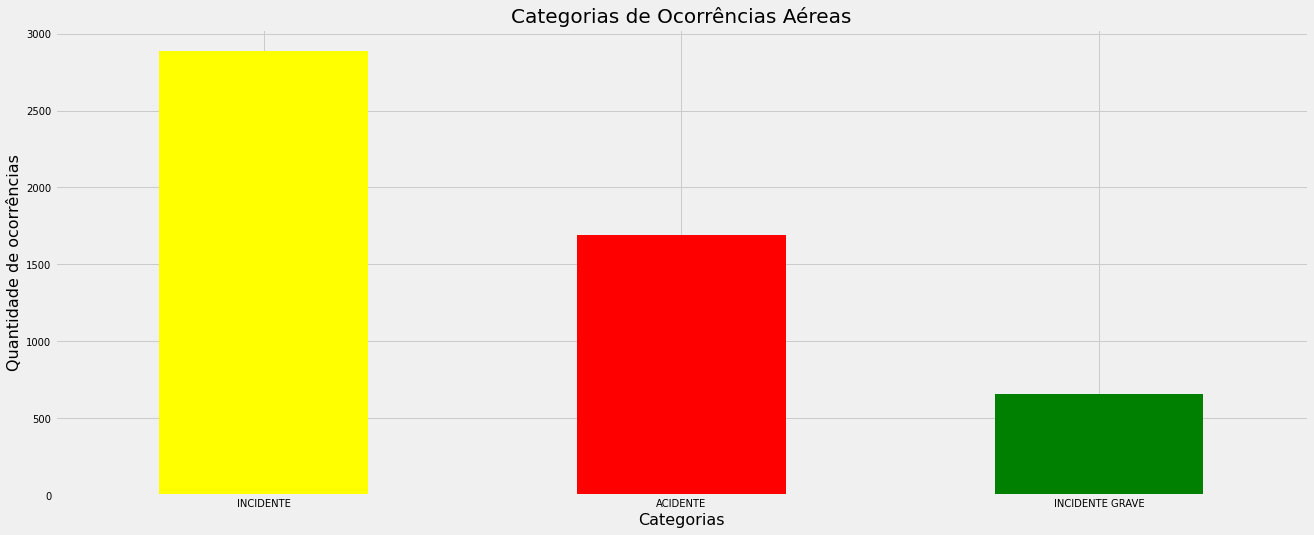

In [35]:
## vamos gerar o gráfico
# definindo o tamanho do gráfico
plt.figure(1, figsize=(20, 8))

# configurar as legendas
plt.title('Categorias de Ocorrências Aéreas', fontsize=20)
plt.xlabel('Categorias', fontsize=16)
plt.ylabel('Quantidade de ocorrências', fontsize=16)

# plotagem do gráfico
df_categorias.plot.bar(color = ['yellow', 'red', 'green'], rot=0) # gera o gráfico
plt.show() # mostra o gráfico na tela quando em um ambiente Jupyter

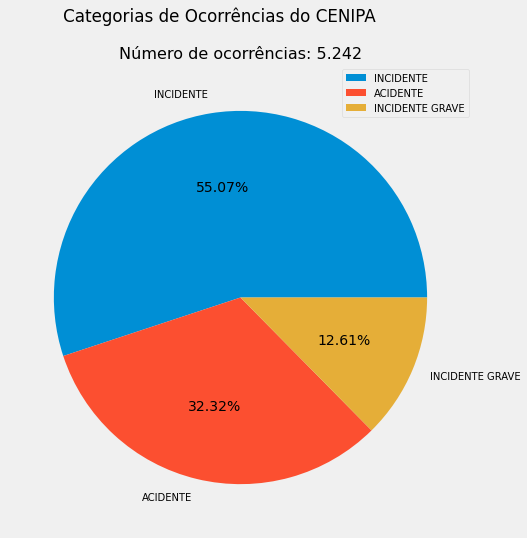

In [45]:
# vamos mostrar os mesmos dados em uma pizza (pie)
plt.figure(1, figsize=(20 , 8))
plt.suptitle('Categorias de Ocorrências do CENIPA')
plt.title('Número de ocorrências: 5.242')
plt.pie(df_categorias, labels = df_categorias.index, autopct="%.2f%%")
plt.legend()
plt.show()

In [ ]:
# mostrar um gráfico de pizza com os estados
plt.figure(1, figsize=(15 , 15))
df_estados  = df['estado'].value_counts()
plt.pie(df_estados, labels = df_estados.index, autopct="%.2f%%")
plt.show()

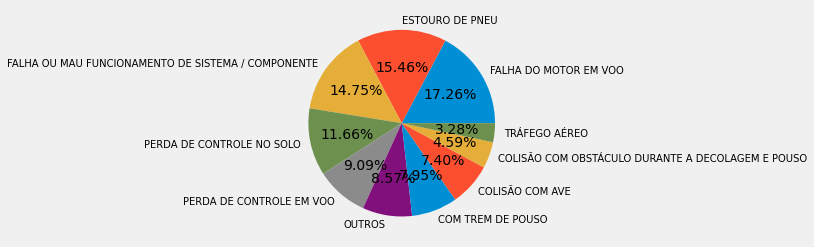

In [53]:
# quais são as ocorrências existentes?
df_descricao = df['descricao'].value_counts().head(10)
plt.pie(df_descricao, labels = df_descricao.index, autopct="%.2f%%")
plt.show()

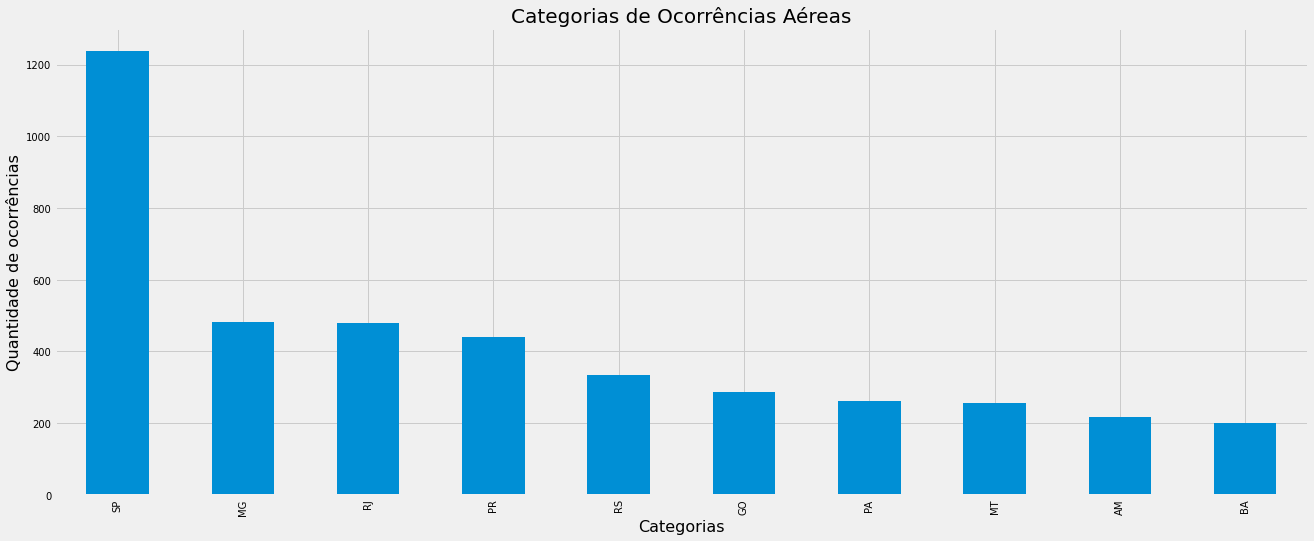

In [57]:
# como visualizar os dados anteriores com "barras"
df_descricao = df['estado'].value_counts().head(10)
plt.figure(1, figsize=(20, 8))

# configurar as legendas
plt.title('Categorias de Ocorrências Aéreas', fontsize=20)
plt.xlabel('Categorias', fontsize=16)
plt.ylabel('Quantidade de ocorrências', fontsize=16)

# plotagem do gráfico
df_descricao.plot.bar() # gera o gráfico
plt.show() # mostra o gráfico na tela quando em um ambiente Jupyter

In [59]:
# quantas cidades diferentes existem nos dados
df['cidade'].nunique() # nunique() mostra valores com base nos dados textuais

1042

In [63]:
# qual a quantidade de ocorrências "por cidade"? - groupby
df_ocorrencias_cidades = df.groupby(['cidade', 'estado'])['codigo'].nunique().sort_values(ascending=False).head(10)
df_ocorrencias_cidades

cidade          estado
RIO DE JANEIRO  RJ        293
SÃO PAULO       SP        252
BELO HORIZONTE  MG        174
GUARULHOS       SP        141
GOIÂNIA         GO        132
BRASÍLIA        DF        129
LONDRINA        PR        126
CAMPINAS        SP        123
MANAUS          AM         95
PORTO ALEGRE    RS         94
Name: codigo, dtype: int64

In [73]:
# distribuição de ocorrências ao longo dos anos por estado
ano_freq_dict = { }
ano_freq_dict['all'] = {}

for s in df['estado'].unique():
    ano_freq_dict[s] = {}

for ocorrencia in df['ano'].unique():    
    ano_freq_dict['all'][ocorrencia] = df['ano'][df['ano'] == ocorrencia].count()
    
    for s in df['estado'].unique():        
        ano_freq_dict[s][ocorrencia] = df['ano'][(df['ano'] == ocorrencia) & (df['estado'] == s)].count()

ano_freq = pd.DataFrame(ano_freq_dict)

ano_freq

,all,PA,PR,MS,GO,RS,MG,AM,TO,RJ,AC,SP,SC,MT,BA,PE,DF,CE,ES,MA,RR,AP,AL,RO,SE,PB,PI,RN
2010,552,31,43,7,27,24,51,19,9,65,7,107,22,27,33,12,23,6,5,12,6,2,3,1,4,3,2,1
2011,576,24,41,14,44,32,42,30,4,77,7,134,11,26,20,10,17,8,9,5,7,0,2,2,4,1,3,2
2012,647,29,43,16,36,37,67,27,7,72,10,153,13,31,29,10,15,8,12,7,8,3,3,1,1,3,4,2
2013,653,25,56,21,36,39,57,33,3,77,3,158,19,30,20,10,16,7,12,6,3,1,1,7,2,5,5,1
2014,567,42,48,13,24,38,49,30,6,49,9,133,11,22,22,9,17,13,3,8,5,0,1,1,4,2,7,1
2015,471,19,44,9,26,29,52,19,5,30,0,121,22,21,16,6,9,8,4,9,4,0,2,5,2,1,5,3
2016,403,17,47,11,17,32,27,10,4,20,2,107,18,23,14,9,12,10,5,4,6,1,0,2,0,2,2,1
2017,434,30,47,12,22,38,40,11,5,28,3,96,20,24,15,5,6,5,8,3,7,0,2,3,1,1,1,1
2018,443,24,28,11,27,36,48,13,3,29,4,111,11,22,17,7,3,7,7,8,0,1,13,5,1,2,4,1
2019,496,22,44,18,27,29,49,25,0,33,9,119,19,29,14,12,11,6,5,6,3,1,3,3,2,3,3,1


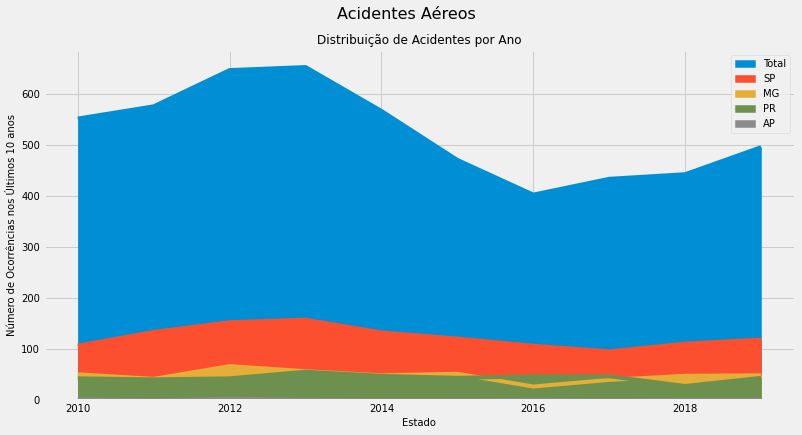

In [86]:
# criando um gráfico com agrupamento
fig, axes = plt.subplots(figsize=(12.,6.))

ano_freq['all'].plot.area(label='Total')
ano_freq['SP'].plot.area(label='SP')
ano_freq['MG'].plot.area(label='MG')
ano_freq['PR'].plot.area(label='PR')
ano_freq['AP'].plot.area(label='AP')

plt.suptitle('Acidentes Aéreos', fontsize=16)
plt.title("Distribuição de Acidentes por Ano", fontsize=12)
axes.set_xlabel('Estado')
axes.set_ylabel('Número de Ocorrências nos Últimos 10 anos')
          
axes.legend(loc='best')
#plt.savefig('acidentes_por_estado.jpg', format='jpg', dpi=600, bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()